
--- Results for crossover single_point and mutation random ---
Best solution: [0 1 0 1 0 0 0 1 0 0 1 0 1 1]
Fitness value of the best solution: 46
Total weight: 24
Conclusion: The solution satisfies the knapsack weight constraint.

--- Results for crossover single_point and mutation adaptive ---
Best solution: [1 1 1 1 0 1 0 0 1 0 0 0 0 1]
Fitness value of the best solution: 83
Total weight: 25
Conclusion: The solution satisfies the knapsack weight constraint.

--- Results for crossover two_points and mutation random ---
Best solution: [1 0 1 0 0 0 1 1 1 1 1 0 0 0]
Fitness value of the best solution: 69
Total weight: 22
Conclusion: The solution satisfies the knapsack weight constraint.

--- Results for crossover two_points and mutation adaptive ---
Best solution: [0 0 0 0 0 1 1 1 1 1 1 0 0 0]
Fitness value of the best solution: 62
Total weight: 23
Conclusion: The solution satisfies the knapsack weight constraint.

--- Results for crossover uniform and mutation random ---
Best solution

/usr/local/lib/python3.11/dist-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


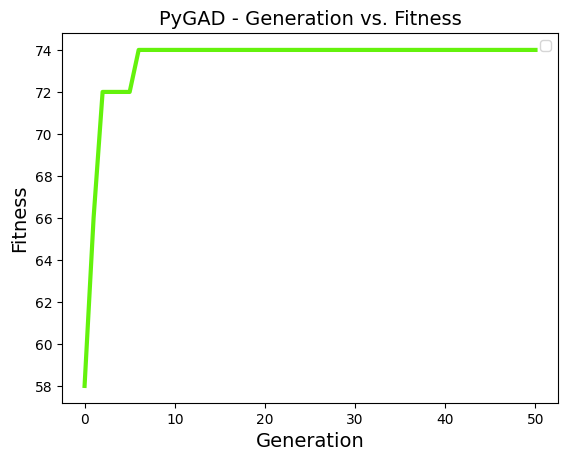


--- Additional Conclusions ---
Best result: Crossover: single_point, Mutation: adaptive
Fitness value: 83, Weight: 25

--- Conclusions ---
1. The knapsack problem was successfully solved using a genetic algorithm.
2. The genetic algorithm uses a population of binary chromosomes (0 - item not selected, 1 - item selected).
3. The fitness function evaluates the total value of items and penalizes solutions exceeding the maximum weight.
4. Single-point crossover was used, along with random mutation.
5. The best item set provides maximum value without exceeding the weight constraint.
6. Results show that the genetic algorithm effectively finds an approximate optimal solution.
7. Algorithm parameter choices (e.g., crossover and mutation types) significantly affect the outcome.


In [4]:
# Install the required library
!pip install pygad

# Import necessary libraries
import pygad
import numpy as np
import matplotlib.pyplot as plt

# Data for the knapsack problem
values = [10, 5, 15, 7, 6, 18, 3, 8, 17, 12, 4, 14, 19, 11]  # Item values
weights = [2, 3, 4, 1, 5, 7, 1, 4, 3, 6, 2, 8, 9, 5]  # Item weights
max_weight = 25  # Maximum weight the knapsack can carry

# Fitness function
def fitness_function(ga_instance, solution, solution_idx):
    total_value = np.sum(solution * values)  # Total value of selected items
    total_weight = np.sum(solution * weights)  # Total weight of selected items
    # Penalize the solution if weight exceeds the maximum limit
    if total_weight > max_weight:
        return 0
    return total_value

# Genetic algorithm parameters
num_generations = 50  # Number of generations
num_parents_mating = 4  # Number of parents for mating
sol_per_pop = 8  # Population size
num_genes = len(values)  # Number of genes (items)
parent_selection_type = "sss"  # Parent selection method (stochastic universal sampling)
crossover_types = ["single_point", "two_points", "uniform"]  # Different crossover types
mutation_types = ["random", "adaptive"]  # Different mutation types
mutation_percent_genes_default = 10  # Percentage of genes to mutate (for random mutation)

# Function to test different genetic algorithm parameters
def test_genetic_algorithm(crossover_type, mutation_type):
    # Initialize mutation_percent_genes
    mutation_percent_genes = mutation_percent_genes_default  # Default value

    # For adaptive mutation, set mutation_percent_genes as a tuple with two values
    if mutation_type == "adaptive":
        mutation_percent_genes = [5, 20]  # Initial and minimum mutation percentages

    # Create a genetic algorithm instance
    ga_instance = pygad.GA(
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_function,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_percent_genes=mutation_percent_genes,
        gene_type=int,  # Genes are integers (0 or 1)
        init_range_low=0,  # Initial gene value - 0 (item not selected)
        init_range_high=2  # Initial gene value - 1 (item selected)
    )

    # Run the genetic algorithm
    ga_instance.run()

    # Get the best solution
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    return solution, solution_fitness, np.sum(solution * weights), ga_instance

# Test different crossovers and mutations
results = []
last_ga_instance = None  # To store the last GA instance for plotting

for crossover in crossover_types:
    for mutation in mutation_types:
        solution, fitness_value, total_weight, ga_instance = test_genetic_algorithm(crossover, mutation)
        last_ga_instance = ga_instance  # Save the last GA instance
        results.append({
            "Crossover": crossover,
            "Mutation": mutation,
            "Best Solution": solution,
            "Fitness Value": fitness_value,
            "Total Weight": total_weight
        })

# Display results
for result in results:
    print("\n--- Results for crossover", result["Crossover"], "and mutation", result["Mutation"], "---")
    print(f"Best solution: {result['Best Solution']}")
    print(f"Fitness value of the best solution: {result['Fitness Value']}")
    print(f"Total weight: {result['Total Weight']}")

    if result['Total Weight'] <= max_weight:
        print("Conclusion: The solution satisfies the knapsack weight constraint.")
    else:
        print("Conclusion: The solution exceeds the knapsack weight constraint, which is unacceptable.")

# Plot fitness trend for the last algorithm
if last_ga_instance:
    last_ga_instance.plot_fitness()

# Additional conclusions
print("\n--- Additional Conclusions ---")
best_result = max(results, key=lambda x: x['Fitness Value'])
print(f"Best result: Crossover: {best_result['Crossover']}, Mutation: {best_result['Mutation']}")
print(f"Fitness value: {best_result['Fitness Value']}, Weight: {best_result['Total Weight']}")

# Conclusions
print("\n--- Conclusions ---")
print("1. The knapsack problem was successfully solved using a genetic algorithm.")
print("2. The genetic algorithm uses a population of binary chromosomes (0 - item not selected, 1 - item selected).")
print("3. The fitness function evaluates the total value of items and penalizes solutions exceeding the maximum weight.")
print("4. Single-point crossover was used, along with random mutation.")
print("5. The best item set provides maximum value without exceeding the weight constraint.")
print("6. Results show that the genetic algorithm effectively finds an approximate optimal solution.")
print("7. Algorithm parameter choices (e.g., crossover and mutation types) significantly affect the outcome.")
